In [ ]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



*   speed_matrix_2015: Loop Speed Matrix

*   Loop_Seattle_2015_A.npy: Loop Adjacency Matrix, which is a numpy matrix to describe the traffic network structure as a graph.
*   Loop_Seattle_2015_reachability_free_flow_Xmin.npy: Loop Free-flow Reachability Matrix during X minites' drive.

*   nodes_loop_mp_list.csv: List of loop detectors' milepost, with the same order of that in the Loop Speed Matrix.
*   Mileposts indicate the distance from a designated starting point





In [38]:
loc = pd.read_csv('/content/drive/MyDrive/Data/Cabinet Location Information.csv')
loc.head()

,CabName,Lat,Lon,Route,Milepost
0,005es00045,47.609618,-122.331050,5,0.45
1,005es00066,47.612600,-122.330358,5,0.66
2,005es00088,47.615682,-122.329174,5,0.88
3,005es00141,47.622847,-122.328635,5,1.41
4,005es00182,45.642140,-122.661989,5,1.82


In [41]:
loc.sum().isnull()

CabName     False
Lat         False
Lon         False
Route       False
Milepost    False
dtype: bool

In [39]:
nodes = pd.read_csv('/content/drive/MyDrive/Data/nodes_loop_mp_list.csv')
nodes.head()

,Unnamed: 0,milepost
0,0,d005es15036
1,1,d005es15125
2,2,d005es15214
3,3,d005es15280
4,4,d005es15315


The name of each milepost header contains 11 characters:



*   1 char: 'd' or 'i', i.e. decreasing direction or increasing direction.

*   2-4 chars: route name, e.g. '405' demonstrates the route I-405.



*   5-6 chars: 'es' has no meanings here.
*   7-11 chars: milepost, e.g. '15036' demonstrates the 150.36 milepost.








In [42]:
nodes.sum().isnull()

Unnamed: 0    False
milepost      False
dtype: bool

In [44]:
speed = pd.read_pickle('/content/drive/MyDrive/Data/speed_matrix_2015')
speed.head()

ID,d005es15036,d005es15125,d005es15214,d005es15280,d005es15315,d005es15348,d005es15410,d005es15465,d005es15531,d005es15569,...,i520es00526,i520es00560,i520es00624,i520es00684,i520es00714,i520es00746,i520es00770,i520es00861,i520es00935,i520es00972
stamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,61.939138,64.280883,62.077397,60.786423,63.120675,64.448315,63.411123,64.739481,63.009918,65.264902,...,64.092842,60.397897,62.045617,62.099860,63.555292,63.625611,62.118397,68.112571,66.567829,62.032062
2015-01-01 00:05:00,59.232527,65.082450,64.808345,65.853953,59.206229,62.496716,65.992183,64.718051,61.244073,65.608728,...,64.244069,64.091079,65.082815,59.930435,63.817700,47.836660,54.307249,59.022999,58.949034,61.212069
2015-01-01 00:10:00,61.991801,65.309123,64.803916,64.266082,62.239202,63.816610,60.196829,65.447790,63.797764,66.017157,...,59.839932,63.624790,57.179902,62.603473,64.117791,58.099941,58.923199,58.710086,56.671427,57.488732
2015-01-01 00:15:00,62.480655,65.191651,67.206597,63.988427,65.808507,64.757556,62.011448,66.334476,61.702734,65.735430,...,65.230148,66.042141,61.952397,58.193563,55.949144,60.140768,57.117960,64.368119,57.892398,64.087189
2015-01-01 00:20:00,62.490484,65.287669,67.323285,64.707409,65.708663,65.358370,65.091449,63.095048,62.186795,65.097373,...,66.005431,61.455915,62.117347,63.089581,62.961678,62.849955,54.681552,62.795588,62.545365,64.567285


In [45]:
speed.sum().isnull()

ID
d005es15036    False
d005es15125    False
d005es15214    False
d005es15280    False
d005es15315    False
               ...  
i520es00746    False
i520es00770    False
i520es00861    False
i520es00935    False
i520es00972    False
Length: 323, dtype: bool

In [3]:
loop = pd.read_csv('/content/drive/MyDrive/Data/loop_20150101_20151231.csv')
loop.head()

,2015-01-01 00:00:00.000,005es15036,d,61.9391381891382,20,0.019345
0,2015-01-01 00:00:00.000,005es15036,i,63.140194,14,0.012163
1,2015-01-01 00:00:00.000,005es15125,i,62.616388,6,0.502598
2,2015-01-01 00:00:00.000,005es15214,i,62.069070,15,0.008918
3,2015-01-01 00:00:00.000,005es15280,d,60.786423,18,0.017343
4,2015-01-01 00:00:00.000,005es15280,i,61.944099,17,0.019155


In [36]:
min5 = np.load('/content/drive/MyDrive/Data/Loop_Seattle_2015_reachability_free_flow_5min.npy')
min25 = np.load('/content/drive/MyDrive/Data/Loop_Seattle_2015_reachability_free_flow_25min.npy')

In [37]:
min5 = pd.DataFrame(min5)
min25 = pd.DataFrame(min25)
print(min5)
print(min25)

     0    1    2    3    4    5    6    7    8    9    ...  313  314  315  \
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  0.0   
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
318  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
319  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
320  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
321  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
322  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   

     316  317  318  319  320  321  322  
0    0.0  0.0  0.0  0.0  0.0  0.0 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import math

class FilterLinear(nn.Module):
    def __init__(self, in_features, out_features, filter_square_matrix, bias=True):
        '''
        filter_square_matrix : filter square matrix, whose each element is 0 or 1.
        '''
        super(FilterLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features

        self.filter_square_matrix = Variable(filter_square_matrix, requires_grad=False)

        self.weight = Parameter(torch.Tensor(out_features, in_features))
        if bias:
            self.bias = Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input):
        return F.linear(input, self.filter_square_matrix.matmul(self.weight), self.bias)

    def __repr__(self):
        return self.__class__.__name__ + '(' \
            + 'in_features=' + str(self.in_features) \
            + ', out_features=' + str(self.out_features) \
            + ', bias=' + str(self.bias is not None) + ')'


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import math
import numpy as np

class LSTM(nn.Module):
    def __init__(self, input_size, cell_size, hidden_size):
        """
        cell_size is the size of cell_state.
        hidden_size is the size of hidden_state, or say the output_state of each step
        """
        super(LSTM, self).__init__()

        self.cell_size = cell_size
        self.hidden_size = hidden_size
        self.fl = nn.Linear(input_size + hidden_size, hidden_size)
        self.il = nn.Linear(input_size + hidden_size, hidden_size)
        self.ol = nn.Linear(input_size + hidden_size, hidden_size)
        self.Cl = nn.Linear(input_size + hidden_size, hidden_size)

    def forward(self, input, Hidden_State, Cell_State):
        combined = torch.cat((input, Hidden_State), 1)
        f = torch.sigmoid(self.fl(combined))
        i = torch.sigmoid(self.il(combined))
        o = torch.sigmoid(self.ol(combined))
        C = torch.tanh(self.Cl(combined))
        Cell_State = f * Cell_State + i * C
        Hidden_State = o * torch.tanh(Cell_State)

        return Hidden_State, Cell_State

    def loop(self, inputs):
        batch_size = inputs.size(0)
        time_step = inputs.size(1)
        Hidden_State, Cell_State = self.initHidden(batch_size)
        for i in range(time_step):
            Hidden_State, Cell_State = self.forward(torch.squeeze(inputs[:,i:i+1,:]), Hidden_State, Cell_State)
        return Hidden_State, Cell_State

    def initHidden(self, batch_size):
        Hidden_State = Variable(torch.zeros(batch_size, self.hidden_size))
        Cell_State = Variable(torch.zeros(batch_size, self.hidden_size))
        return Hidden_State, Cell_State


In [3]:
import torch
import numpy as np
from torch.autograd import Variable
import time

def TrainLSTM(train_dataloader, valid_dataloader, num_epochs=3):
    inputs, labels = next(iter(train_dataloader))
    [batch_size, step_size, fea_size] = inputs.size()
    input_dim = fea_size
    hidden_dim = fea_size
    output_dim = fea_size

    lstm = LSTM(input_dim, hidden_dim, output_dim)
    loss_MSE = torch.nn.MSELoss()
    loss_L1 = torch.nn.L1Loss()
    learning_rate = 0.01 #1e-5
    optimizer = torch.optim.RMSprop(lstm.parameters(), lr=learning_rate)

    interval = 100
    losses_train = []
    losses_interval_train = []
    losses_valid = []
    losses_interval_valid = []
    cur_time = time.time()
    pre_time = time.time()

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        trained_number = 0
        valid_dataloader_iter = iter(valid_dataloader)

        for data in train_dataloader:
            inputs, labels = data

            if inputs.shape[0] != batch_size:
                continue

            inputs, labels = Variable(inputs), Variable(labels)
            lstm.zero_grad()
            Hidden_State, Cell_State = lstm.loop(inputs)
            loss_train = loss_MSE(Hidden_State, labels)
            losses_train.append(loss_train.data)
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

            try:
                inputs_val, labels_val = next(valid_dataloader_iter)
            except StopIteration:
                valid_dataloader_iter = iter(valid_dataloader)
                inputs_val, labels_val = next(valid_dataloader_iter)

            inputs_val, labels_val = Variable(inputs_val), Variable(labels_val)
            Hidden_State, Cell_State = lstm.loop(inputs_val)
            loss_valid = loss_MSE(Hidden_State, labels_val)
            losses_valid.append(loss_valid.data)
            trained_number += 1

            if trained_number % interval == 0:
                cur_time = time.time()
                loss_interval_train = np.around(sum(losses_train[-interval:]).numpy() / interval, decimals=8)
                losses_interval_train.append(loss_interval_train)
                loss_interval_valid = np.around(sum(losses_valid[-interval:]).numpy() / interval, decimals=8)
                losses_interval_valid.append(loss_interval_valid)
                print(f'Iteration #: {trained_number * batch_size}, train_loss: {loss_interval_train}, valid_loss: {loss_interval_valid}, time: {np.around([cur_time - pre_time], decimals=8)}')
                pre_time = cur_time

    return lstm, [losses_train, losses_interval_train, losses_valid, losses_interval_valid]

In [5]:
import torch.utils.data as utils
import torch
import numpy as np
import pandas as pd
import pickle

def PrepareDataset(speed_matrix, BATCH_SIZE=40, seq_len=10, pred_len=1, train_propotion=0.7, valid_propotion=0.2):

    time_len = speed_matrix.shape[0]
    max_speed = speed_matrix.max().max()
    speed_matrix = speed_matrix / max_speed
    incident= np.random.choice([0, 1]),  # 0: No incident, 1: Incident
    weather = np.random.uniform(0, 1),  # 0: Clear, 1: Severe
    day_of_week = np.random.choice(range(7)),  # 0: Monday, 6: Sunday
    time_of_day= np.random.choice(range(24)),  # 0: Midnight, 23: 11 PM
    events = np.random.choice([0, 1]),  # 0: No event, 1: Event
    road_condition = np.random.randint(1, 5)
    public_transport = np.random.choice([0, 1]),  # 0: No PT, 1: PT available

    speed_sequences, speed_labels = [], []
    for i in range(time_len - seq_len - pred_len):
        speed_sequences.append(speed_matrix.iloc[i:i+seq_len].values)
        speed_labels.append(speed_matrix.iloc[i+seq_len:i+seq_len+pred_len].values)
    speed_sequences, speed_labels = np.asarray(speed_sequences), np.asarray(speed_labels)

    sample_size = speed_sequences.shape[0]
    index = np.arange(sample_size, dtype=int)
    np.random.shuffle(index)

    train_index = int(np.floor(sample_size * train_propotion))
    valid_index = int(np.floor(sample_size * (train_propotion + valid_propotion)))

    train_data, train_label = speed_sequences[:train_index], speed_labels[:train_index]
    valid_data, valid_label = speed_sequences[train_index:valid_index], speed_labels[train_index:valid_index]
    test_data, test_label = speed_sequences[valid_index:], speed_labels[valid_index:]

    train_data, train_label = torch.Tensor(train_data), torch.Tensor(train_label)
    valid_data, valid_label = torch.Tensor(valid_data), torch.Tensor(valid_label)
    test_data, test_label = torch.Tensor(test_data), torch.Tensor(test_label)

    train_dataset = utils.TensorDataset(train_data, train_label)
    valid_dataset = utils.TensorDataset(valid_data, valid_label)
    test_dataset = utils.TensorDataset(test_data, test_label)

    train_dataloader = utils.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
    valid_dataloader = utils.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
    test_dataloader = utils.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

    return train_dataloader, valid_dataloader, test_dataloader, max_speed

if __name__ == "__main__":

    speed_matrix = pd.read_pickle('/content/drive/MyDrive/Data/speed_matrix_2015')
    A = np.load('/content/drive/MyDrive/Data/Loop_Seattle_2015_A.npy')
    FFR_5min = np.load('/content/drive/MyDrive/Data/Loop_Seattle_2015_reachability_free_flow_5min.npy')
    FFR_10min = np.load('/content/drive/MyDrive/Data/Loop_Seattle_2015_reachability_free_flow_10min.npy')
    FFR_15min = np.load('/content/drive/MyDrive/Data/Loop_Seattle_2015_reachability_free_flow_15min.npy')
    FFR_20min = np.load('/content/drive/MyDrive/Data/Loop_Seattle_2015_reachability_free_flow_20min.npy')
    FFR_25min = np.load('/content/drive/MyDrive/Data/Loop_Seattle_2015_reachability_free_flow_25min.npy')
    FFR = [FFR_5min, FFR_10min, FFR_15min, FFR_20min, FFR_25min]

    train_dataloader, valid_dataloader, test_dataloader, max_speed = PrepareDataset(speed_matrix)

    lstm, lstm_loss = TrainLSTM(train_dataloader, valid_dataloader, num_epochs=1)
    with open('lstm.pkl', 'wb') as file:
        pickle.dump(lstm, file)



Epoch 0/0
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([40, 1, 323])) that is different to the input size (torch.Size([40, 323])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Iteration #: 4000, train_loss: 0.06993314, valid_loss: 0.0671229, time: [20.0161798]
Iteration #: 8000, train_loss: 0.01965636, valid_loss: 0.01996332, time: [11.87103796]
Iteration #: 12000, train_loss: 0.01022287, valid_loss: 0.01136791, time: [12.16469121]
Iteration #: 16000, train_loss: 0.00825394, valid_loss: 0.00882367, time: [11.92274833]
Iteration #: 20000, train_loss: 0.00706857, valid_loss: 0.0082818, time: [10.2020514]
Iteration #: 24000, train_loss: 0.00660154, valid_loss: 0.00759264, time: [8.95273089]
Iteration #: 28000, train_loss: 0.00644988, valid_loss: 0.00728875, time: [10.22538781]
Iteration #: 32000, train_loss: 0.0062888, valid_loss: 0.00696658, time: [9.99767756]
Iteration #: 36000, train_loss: 0.00610011, valid_loss: 0.00688108, time: [9.59207988]
Iteration #: 40000, train_loss: 0.00579011, valid_loss: 0.00669261, time: [10.0264864]
Iteration #: 44000, train_loss: 0.00598786, valid_loss: 0.00656558, time: [10.56562781]
Iteration #: 48000, train_loss: 0.00594544,

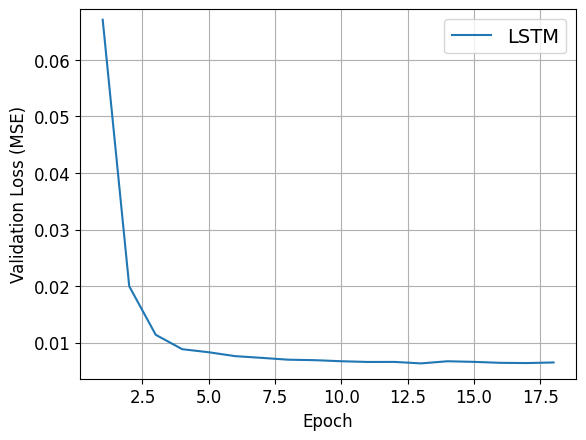

In [24]:
import matplotlib.pyplot as plt
lstm_val_loss = np.asarray(lstm_loss[3])
fig, ax = plt.subplots()
plt.plot(np.arange(1, len(lstm_val_loss) + 1), lstm_val_loss,  label = 'LSTM')
plt.ylim((6 * 0.0006, 0.069))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Validation Loss (MSE)', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=14)
plt.grid(True, which='both')

In [6]:
with open('lstm.pkl', 'rb') as file:
    lstm = pickle.load(file)
print("Loaded Model")

Loaded Model
